JP: Google Colab only supports python 2.7.

Might make our lives easier to share some visualizations etc. You can apply for access and google might get back to you in a couple of days.

In [54]:
# download actually doesn't take that much time...
import urllib2
response = urllib2.urlopen('http://data.insideairbnb.com/united-states/ny/new-york-city/2017-10-02/data/listings.csv.gz')
filename = "listings.csv.gz"
html = response.read()
with open(filename, "w") as file:
  file.write(html)

ModuleNotFoundError: No module named 'urllib2'

In [1]:
filename = "listings.csv.gz"
import pandas as pd
df = pd.read_csv(filename, compression="gzip", index_col=0)

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
pd.set_option('display.max_columns', 100)
df.columns


Index(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedr

In [5]:
df.describe()

,scrape_id,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,4.431700e+04,4.431700e+04,0.0,44085.000000,44085.000000,44317.000000,44317.000000,44317.000000,44173.000000,44244.000000,44226.000000,549.000000,44317.000000,44317.000000,4.431700e+04,44317.000000,44317.000000,44317.000000,44317.000000,44317.000000,34218.000000,34140.000000,34171.000000,34044.000000,34143.000000,34025.000000,34021.00000,0.0,44317.000000,34843.000000
mean,2.017100e+13,3.673429e+07,NaN,2.275105,2.275105,40.730049,-73.954700,2.813255,1.132739,1.158892,1.555895,727.732240,1.482388,4.008665,6.421371e+04,5.904484,16.717490,28.710021,125.928921,18.145836,93.487492,9.569156,9.236721,9.726971,9.748733,9.446936,9.38053,NaN,1.681680,1.446368
std,1.567205e+01,4.062983e+07,NaN,15.084298,15.084298,0.053905,0.042382,1.853114,0.412206,0.721120,1.071849,633.253518,1.090597,12.574811,1.049199e+07,9.099126,20.318114,32.075297,138.747266,33.066623,8.209607,0.817257,1.076149,0.689432,0.670241,0.805804,0.86134,NaN,2.160082,1.638707
min,2.017100e+13,7.200000e+01,NaN,0.000000,0.000000,40.499794,-74.253269,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,NaN,1.000000,0.010000
25%,2.017100e+13,5.369934e+06,NaN,1.000000,1.000000,40.691219,-73.983490,2.000000,1.000000,1.000000,1.000000,325.000000,1.000000,1.000000,2.900000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.00000,NaN,1.000000,0.270000
50%,2.017100e+13,2.076185e+07,NaN,1.000000,1.000000,40.723624,-73.956728,2.000000,1.000000,1.000000,1.000000,700.000000,1.000000,2.000000,1.125000e+03,0.000000,5.000000,14.000000,63.000000,5.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,NaN,1.000000,0.870000
75%,2.017100e+13,5.191383e+07,NaN,2.000000,2.000000,40.764029,-73.939366,4.000000,1.000000,1.000000,2.000000,925.000000,2.000000,4.000000,1.125000e+03,9.000000,31.000000,58.000000,279.000000,20.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,NaN,2.000000,2.100000
max,2.017100e+13,1.528827e+08,NaN,979.000000,979.000000,40.909174,-73.710126,16.000000,15.500000,14.000000,40.000000,5000.000000,16.000000,1250.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,489.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,NaN,35.000000,24.530000


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
pd.options.mode.chained_assignment = None

def cleanAirbnbData(infile_name):
  df = pd.read_csv(infile_name, compression="gzip", index_col=0)
  # we are not using images
  selected_columns = ['last_scraped','calendar_last_scraped', 'calendar_updated', 'host_since', 'host_response_time', 'host_response_rate', 
                    'host_acceptance_rate', 'host_is_superhost','host_neighbourhood', 'host_listings_count', 
                    'host_total_listings_count','host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 
                    'neighbourhood_group_cleansed','smart_location', 'latitude', 
                    'longitude', 'is_location_exact', 'property_type', 'room_type', 
                    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 
                    'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 
                    'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 
                    'minimum_nights', 'maximum_nights', 'has_availability', 
                    'availability_30', 'availability_60', 'availability_90', 'availability_365', 
                    'number_of_reviews','first_review', 'last_review', 
                    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                    'review_scores_value','requires_license', 'license', 'jurisdiction_names', 
                    'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 
                    'require_guest_profile_picture', 'require_guest_phone_verification', 
                    'calculated_host_listings_count', 'reviews_per_month']
  
  # there are some columns that have same value for all entries. We will add on to this list as we study the values of columns.
  unnecessary_columns = ['requires_license', 'license', 'host_acceptance_rate', "has_availability", "last_scraped", "calendar_last_scraped", 'calendar_updated',
                        'host_neighbourhood', 'host_total_listings_count', 'street', 'neighbourhood', 'city', 'smart_location', 'neighbourhood_cleansed', 
                    'neighbourhood_group_cleansed', 'weekly_price', 'monthly_price', 'jurisdiction_names']
  
  # deal with these columns later
  temporarily_ignore  = ["calendar_updated", "amenities", "square_feet", 'availability_30', 'availability_60']
  
  # select columns to use
  data = df[[col for col in selected_columns if col not in unnecessary_columns and col not in temporarily_ignore]]
  
  # These columns are categorical. Change strings to numeric codes. Note that NaN gets changed to -1 here.
  for col in ["host_neighbourhood", "street",	"neighbourhood",	"neighbourhood_cleansed",	
              "neighbourhood_group_cleansed",	"smart_location", "host_response_time",
              "property_type",	"room_type", "bed_type", "jurisdiction_names"]:
    if col not in unnecessary_columns and col not in temporarily_ignore:
      exec("data."+col+" = pd.Categorical(data."+col+")")
      data[col] = eval("data."+col+".cat.codes.astype('category')")
  
  # remove dollar sign
  for col in ["price", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee", "extra_people"]:
    if col not in unnecessary_columns and col not in temporarily_ignore:
      data[col] = data[col].replace( '[\$,)]','', regex=True ) .replace( '[(]','-', regex=True ).astype(float) #doesn't do anything to NaN value, which is good
  
  # change percentage in host_response_rate to float point value
  data["host_response_rate"] = data["host_response_rate"].str[:-1].astype(float)/100
  
  # change types of date columns to 'datetime64[ns]'
  for col in ['host_since', "last_scraped",	"calendar_last_scraped", "first_review", "last_review"]:
    if col not in unnecessary_columns and col not in temporarily_ignore:
      data[col] = pd.to_datetime(data[col])
      # convert the dates or timestamps to an integer number of days since the start of the data.
      data[col] = (data[col] - data[col].min())  / np.timedelta64(1,'D')
  
  # columns with (f,t) values: change f,t to 0,1 (there might still be np.nan values)
  for col in ["requires_license","host_is_superhost","is_business_travel_ready",
              "instant_bookable","has_availability","is_location_exact","host_identity_verified",
              "require_guest_profile_picture","require_guest_phone_verification"]:
    if col not in unnecessary_columns and col not in temporarily_ignore:
      temp = data[col].map({'f':0,'t':1})
      # Convert numeric 0 and 1 to Categorical, in order to better handle the missing data
      temp = temp.astype('category')
      data.drop(col,1,inplace=True)
      data[col] = temp
      
  # column with binary values "cancellation_policy": {"moderate": 0, "strict":1}
  cancellation_policy = data["cancellation_policy"].map({"moderate": 0, "strict":1})
  data.drop("cancellation_policy",1,inplace=True)
  data["cancellation_policy"] = cancellation_policy
  
  # replace -1 values to NaN so that I can replace all NaN with mean
  #data["host_neighbourhood"].replace(-1, np.nan, True)
  #data["neighbourhood"].replace(-1, np.nan, True)
  
  return data

def fillnaAirbnbData(data):
  # This is the line that replaces NaN in all columns. 
  # To just change categorical columns to use mode (or knn), 
  # you need to change this line in order to take care of different columns separately
  # data.fillna(data.mean(), inplace=True) 
  
  # Replace numeric data with mean
  from pandas.api.types import is_numeric_dtype
  from sklearn.neighbors import KNeighborsClassifier
  for col in data.columns:
    if(is_numeric_dtype(data[col])):
        data[col+'mv'] = pd.isnull(data[col])
        data[col][pd.isnull(data[col])] = data[col].dropna().mean()
  
  # Replace missing categorical data using knn

  #find categorical columns that contains NaN
  col_contains_null = data.isnull().any()[data.isnull().any()==True].index

  for var in col_contains_null:
    data[var + 'mv'] = pd.isnull(data[var])
    train = data[data[var].notnull()]
    test = data[pd.isnull(data[var])]
    # Problem: how to temporarily replace categorical variables in train with mode?
    for col in train.columns:
      if (pd.core.common.is_categorical_dtype(train[col])):
        train[col] = train[col].replace(to_replace = "NaN",value = train[col].dropna().mode())
            
    # Problem: how to temporarily replace categorical variables in test with mode?
    for col in test.columns:
      if(col!=var):
        if (pd.core.common.is_categorical_dtype(test[col])):
          test[col] = test[col].replace(to_replace = 'NaN',value = test[col].dropna().mode())
    
    # Temporarily drop any categorical data containing NaN when fitting knn
    train_x = train.drop(['host_is_superhost','host_identity_verified'],axis = 1) #'neighbourhood','host_neighbourhood',
    train_y = train[var]
    test_x = test.drop(['host_is_superhost','host_identity_verified'],axis = 1) #'neighbourhood','host_neighbourhood',
    
    # Fit and Predict using knn
    knn = KNeighborsClassifier(n_neighbors = 7)
    knn = knn.fit(train_x,train_y)
    pred = knn.predict(test_x)
    data[var][pd.isnull(data[var])] = pred

  return data

def scaleAirbnbData(data):
  # scale data
  save = data["price"]
  data.drop("price",axis=1,inplace=True)
  data_scaled = pd.DataFrame(scale(data), columns=data.columns, index=data.index) 
  data_scaled["price"] = save
  
  return data_scaled

mydata = cleanAirbnbData("listings.csv.gz")
mydata = fillnaAirbnbData(mydata)
mydata = scaleAirbnbData(mydata)

mydata.head()

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:140: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead


,host_since,host_response_time,host_response_rate,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_checkinmv,review_scores_communicationmv,review_scores_locationmv,review_scores_valuemv,calculated_host_listings_countmv,reviews_per_monthmv,cancellation_policymv,host_is_superhostmv,host_identity_verifiedmv,price
id,,,,,,,,,,,,,,,,,,,,,
18461891,-1.581517,-1.346248,5.553145e-14,-0.084755,0.817983,0.907343,-0.410282,-0.962452,-0.438863,-0.32255,...,1.820420,1.831914,1.818232,1.817771,0.0,1.917746,-0.674127,-0.072544,-0.072544,110.0
20702398,-1.406905,1.042105,4.479918e-01,-0.084755,2.210228,3.968528,2.189491,0.861885,-0.438863,-0.32255,...,-0.549324,-0.545877,-0.549985,-0.550124,0.0,-0.521445,-0.674127,-0.072544,-0.072544,50.0
6627449,-0.150878,1.042105,4.479918e-01,-0.084755,2.221061,3.966157,-0.410282,-0.962452,0.100775,-0.32255,...,-0.549324,-0.545877,-0.549985,-0.550124,0.0,-0.521445,-0.674127,-0.072544,-0.072544,125.0
19949243,-1.522824,0.445017,4.479918e-01,-0.084755,2.203686,4.068407,-0.063646,-0.962452,0.640413,-0.32255,...,1.820420,1.831914,1.818232,1.817771,0.0,1.917746,-0.674127,-0.072544,-0.072544,100.0
1886820,-0.372443,-1.346248,5.553145e-14,-0.084755,2.060956,4.050088,2.189491,-0.962452,0.640413,4.53735,...,1.820420,1.831914,1.818232,1.817771,0.0,1.917746,-0.674127,-0.072544,-0.072544,300.0


In [7]:
pd.set_option('display.max_columns', 500)
mydata.describe()

,host_since,host_response_time,host_response_rate,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_is_superhost,is_business_travel_ready,instant_bookable,is_location_exact,host_identity_verified,require_guest_profile_picture,require_guest_phone_verification,cancellation_policy,host_sincemv,host_response_ratemv,host_listings_countmv,latitudemv,longitudemv,accommodatesmv,bathroomsmv,bedroomsmv,bedsmv,pricemv,security_depositmv,cleaning_feemv,guests_includedmv,extra_peoplemv,minimum_nightsmv,maximum_nightsmv,availability_90mv,availability_365mv,number_of_reviewsmv,first_reviewmv,last_reviewmv,review_scores_ratingmv,review_scores_accuracymv,review_scores_cleanlinessmv,review_scores_checkinmv,review_scores_communicationmv,review_scores_locationmv,review_scores_valuemv,calculated_host_listings_countmv,reviews_per_monthmv,cancellation_policymv,host_is_superhostmv,host_identity_verifiedmv,price
count,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,44317.0,44317.0,44317.0,4.431700e+04,4.431700e+04,4.431700e+04,44317.0,4.431700e+04,4.431700e+04,44317.0,44317.0,44317.0,44317.0,44317.0,44317.0,44317.0,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,44317.0,4.431700e+04,4.431700e+04,4.431700e+04,4.431700e+04,44317.000000
mean,5.677251e-16,1.947860e-14,1.007318e-15,-2.147312e-15,-6.713421e-14,-5.872383e-14,-3.510189e-14,2.924503e-16,-2.669693e-15,-8.394709e-15,-8.495445e-15,-6.933163e-16,-1.677150e-15,5.347769e-16,7.444809e-15,4.414492e-15,-4.383141e-16,-3.918724e-16,8.954682e-16,-8.883593e-15,-6.318283e-15,-1.672281e-15,-3.961700e-17,2.003166e-15,-1.746392e-15,-1.740478e-16,5.929649e-17,-2.264327e-15,2.697437e-15,-5.725509e-14,6.045523e-15,-4.773871e-15,-1.594663e-15,1.871341e-15,-5.606505e-16,7.799409e-15,4.152976e-15,3.850635e-15,4.557800e-15,6.104176e-15,-2.348500e-15,1.177603e-15,-4.423937e-15,1.177603e-15,0.0,0.0,0.0,3.897762e-15,3.911787e-15,-1.312489e-15,0.0,8.026406e-15,-5.100708e-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.365296e-15,-4.227520e-15,6.206316e-15,8.073361e-15,1.100758e-15,-2.400569e-16,3.859218e-15,5.791989e-16,-3.973725e-15,0.0,-2.365296e-15,-4.827452e-15,1.177603e-15,1.177603e-15,147.675948
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,0.0,0.0,0.0,1.000011e+00,1.000011e+00,1.000011e+00,0.0,1.000011e+00,1.000011e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,0.0,1.000011e+00,1.000011e+00,1.0

In [60]:
from sklearn.cross_validation import KFold
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

kfolds = KFold(len(mydata), n_folds = 10)
for train_indices, val_indices in kfolds:
  train = mydata.iloc[train_indices, :]
  validate  = mydata.iloc[val_indices, :]
  # linear regression as baseline?
  regr = linear_model.LinearRegression()
  regr.fit(train.drop("price",axis=1,inplace=False),train["price"])
  pred = regr.predict(validate.drop("price",axis=1,inplace=False))
  #print(pred)
  #print('Coefficients: \n', regr.coef_)
  print("Mean squared error: %.2f"
      % mean_squared_error(validate["price"], pred))
  print('Variance score: %.2f' % r2_score(validate["price"], pred))

  

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Mean squared error: 31296.87
Variance score: 0.01
Mean squared error: 8373.18
Variance score: 0.32
Mean squared error: 32986.87
Variance score: 0.30
Mean squared error: 62005.01
Variance score: 0.12
Mean squared error: 22292.06
Variance score: 0.32
Mean squared error: 20272.85
Variance score: 0.36
Mean squared error: 42912.40
Variance score: 0.21
Mean squared error: 52646.09
Variance score: 0.22
Mean squared error: 44301.71
Variance score: 0.24
Mean squared error: 15342.17
Variance score: 0.39


In [61]:
#unscaled data, NaN values are NaN. In order to replace NaN and rescale, call fillnaAirbnbData(), scaleAirbnbData(mydata)
pd.set_option('display.max_columns', 500)
visData = cleanAirbnbData("listings.csv.gz") 
visData.describe()

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,host_since,host_response_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,cancellation_policy
count,44085.000000,30638.000000,44085.000000,44317.000000,44317.000000,44317.000000,44173.000000,44244.000000,44226.000000,44317.000000,23615.000000,32112.000000,44317.000000,44317.000000,44317.000000,4.431700e+04,44317.000000,44317.000000,44317.000000,34843.000000,34877.000000,34218.000000,34140.000000,34171.000000,34044.000000,34143.000000,34025.000000,34021.00000,44317.000000,34843.000000,30470.000000
mean,2324.825201,0.935513,2.275105,40.730049,-73.954700,2.813255,1.132739,1.158892,1.555895,147.675948,293.189456,59.789798,1.482388,13.911366,4.008665,6.421371e+04,28.710021,125.928921,18.145836,2671.745573,2500.975657,93.487492,9.569156,9.236721,9.726971,9.748733,9.446936,9.38053,1.681680,1.446368,0.650312
std,683.312365,0.173127,15.084298,0.053905,0.042382,1.853114,0.412206,0.721120,1.071849,209.138888,412.664591,47.140280,1.090597,22.936934,12.574811,1.049199e+07,32.075297,138.747266,33.066623,528.578240,257.827579,8.209607,0.817257,1.076149,0.689432,0.670241,0.805804,0.86134,2.160082,1.638707,0.476879
min,0.000000,0.000000,0.000000,40.499794,-74.253269,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,1.000000,0.010000,0.000000
25%,1834.000000,1.000000,1.000000,40.691219,-73.983490,2.000000,1.000000,1.000000,1.000000,70.000000,100.000000,25.000000,1.000000,0.000000,1.000000,2.900000e+01,0.000000,0.000000,1.000000,2457.000000,2418.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.00000,1.000000,0.270000,0.000000
50%,2380.000000,1.000000,1.000000,40.723624,-73.956728,2.000000,1.000000,1.000000,1.000000,105.000000,200.000000,50.000000,1.000000,0.000000,2.000000,1.125000e+03,14.000000,63.000000,5.000000,2801.000000,2634.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,1.000000,0.870000,1.000000
75%,2850.000000,1.000000,2.000000,40.764029,-73.939366,4.000000,1.000000,1.000000,2.000000,175.000000,400.000000,80.000000,2.000000,25.000000,4.000000,1.125000e+03,58.000000,279.000000,20.000000,3089.000000,2652.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,2.000000,2.100000,1.000000
max,3498.000000,1.000000,979.000000,40.909174,-73.710126,16.000000,15.500000,14.000000,40.000000,10000.000000,5100.000000,975.000000,16.000000,300.000000,1250.000000,2.147484e+09,90.000000,365.000000,489.000000,3276.000000,2666.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,35.000000,24.530000,1.000000


In [62]:
# Let us load in the relevant Python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'plotly'

ValueError: labels ['host_is_superhost' 'host_identity_verified'] not contained in axis

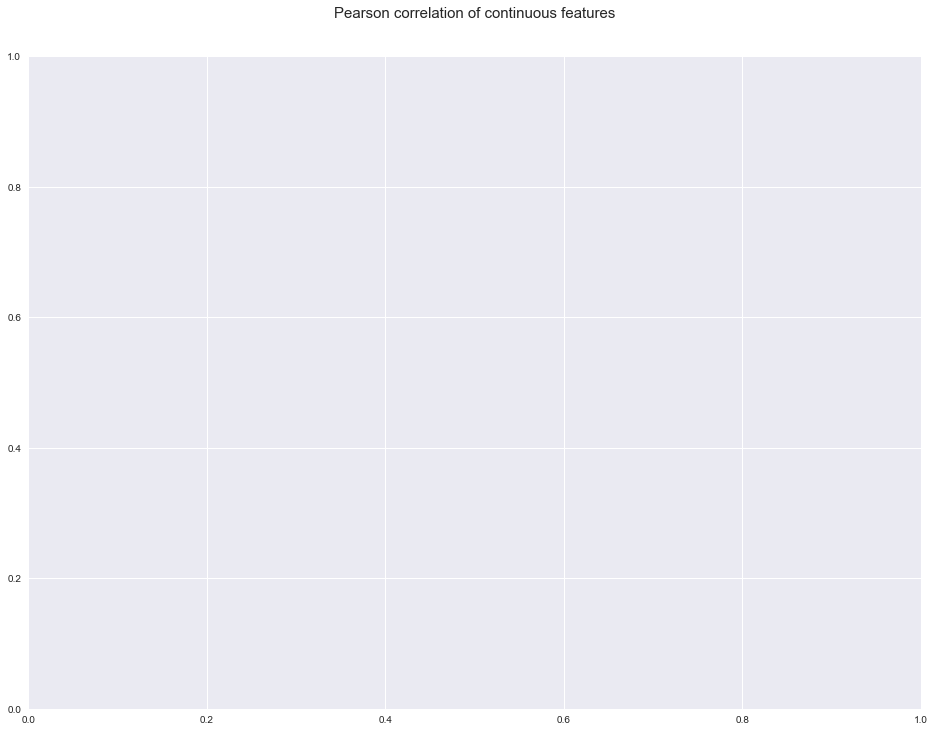

In [63]:
# code from here https://www.kaggle.com/arthurtok/interactive-porto-insights-a-plot-ly-tutorial
# correlation of float features (excluding categories)
train_float = visData.select_dtypes(include=['float64'])

colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.drop(["host_is_superhost","host_identity_verified", "cancellation_policy"],axis=1).corr(),
            linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

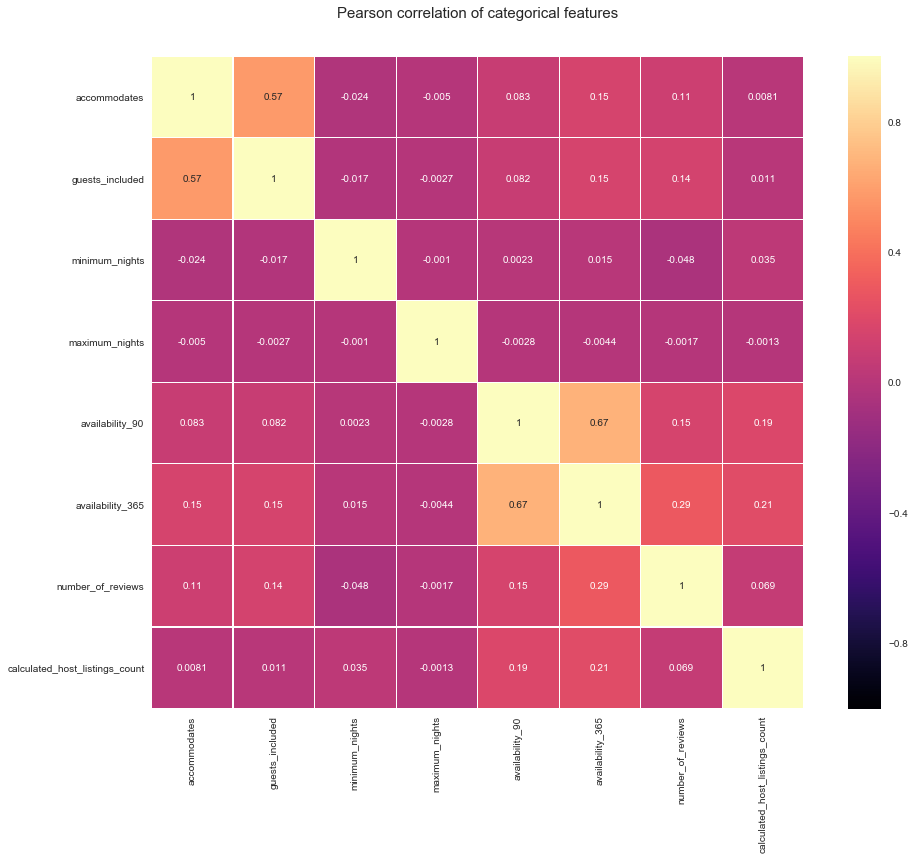

In [64]:
categorical_features = visData.select_dtypes(include=['int64'])
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of categorical features', y=1.05, size=15)
sns.heatmap(categorical_features.corr(),
            linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

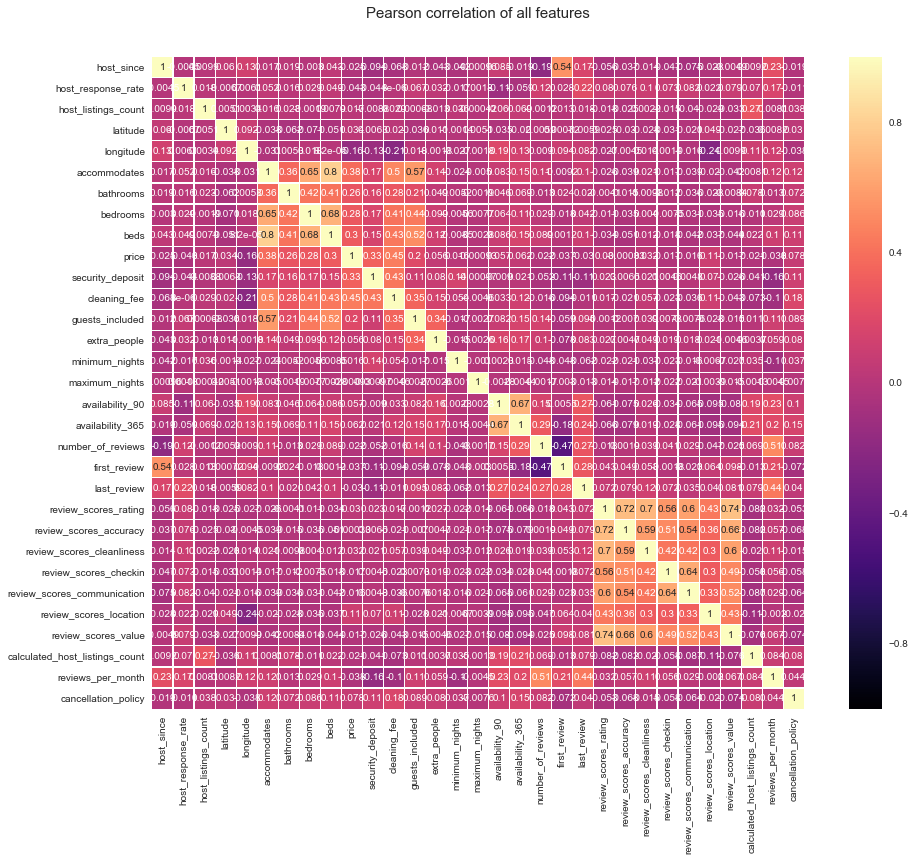

In [65]:
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of all features', y=1.05, size=15)
sns.heatmap(visData.corr(),
            linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

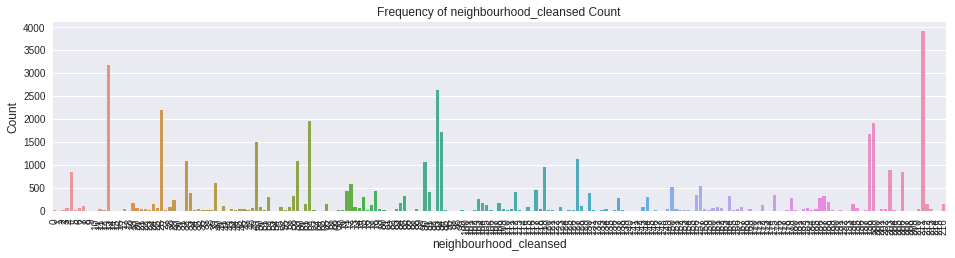

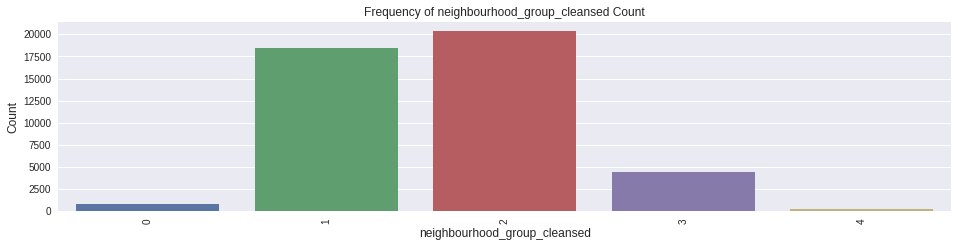

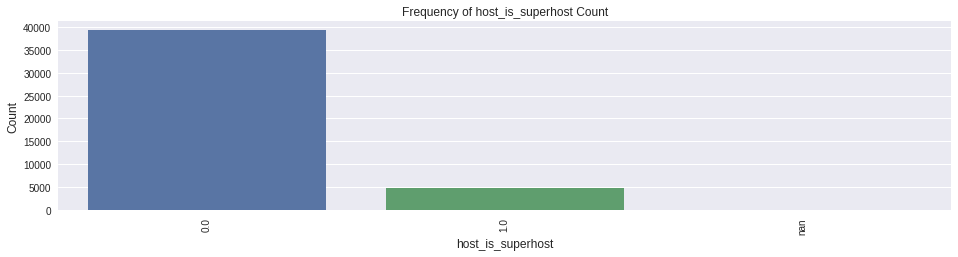

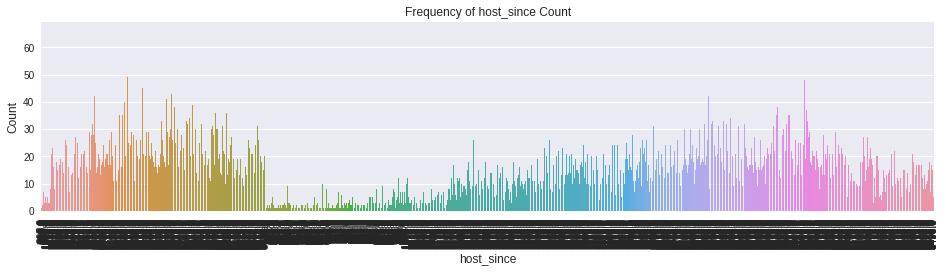

In [130]:
# neighbourhood_cleansed count
def drawOnePlot(colName):
  
  column_order = visData[colName].unique()
  column_order=sorted(column_order, key=lambda x: float(x))
  sns.countplot(x=colName, data=visData , order = column_order)
  plt.ylabel('Count', fontsize=12)
  plt.xlabel(colName, fontsize=12)
  plt.xticks(rotation='vertical')
  plt.title("Frequency of "+colName+" Count", fontsize=12)
  plt.show()
  column_count = Counter(visData[colName]).most_common()

plt.figure(figsize=(16,16))
plt.subplot(411)
drawOnePlot('neighbourhood_cleansed')
plt.figure(figsize=(16,16))
plt.subplot(412)
drawOnePlot('neighbourhood_group_cleansed')
plt.figure(figsize=(16,16))
plt.subplot(413)
drawOnePlot("host_is_superhost")
plt.figure(figsize=(16,16))
plt.subplot(414)
drawOnePlot('host_since')

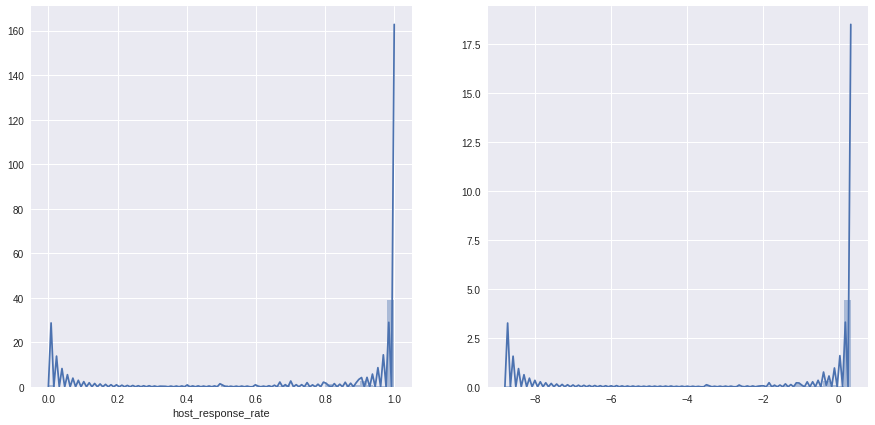

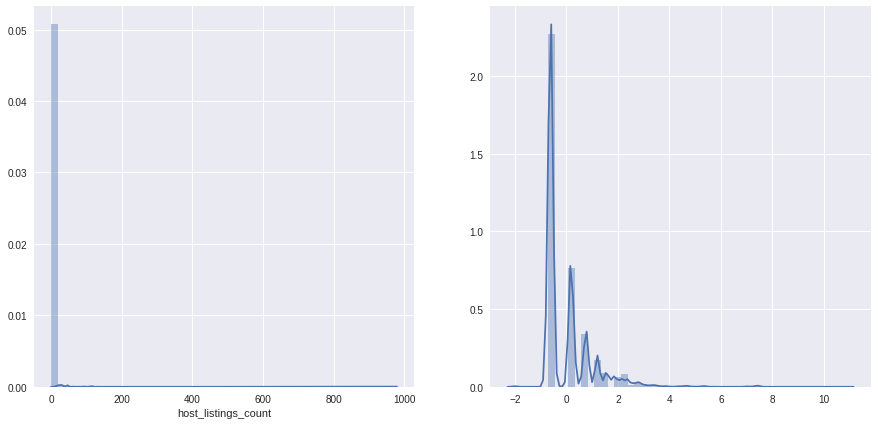

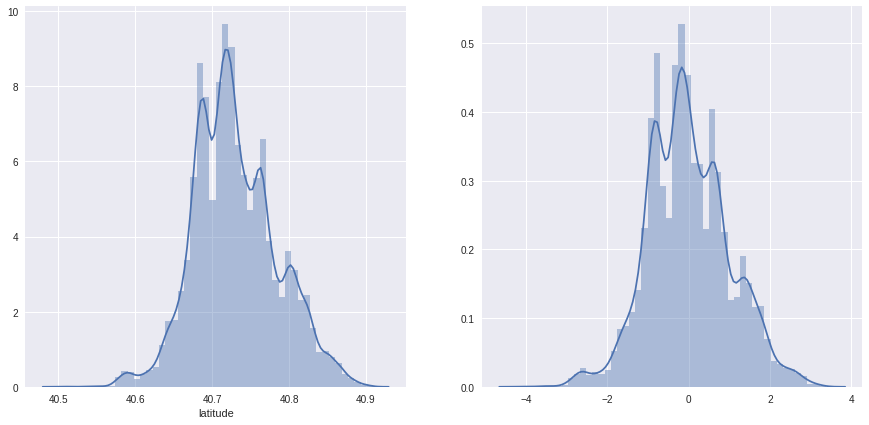

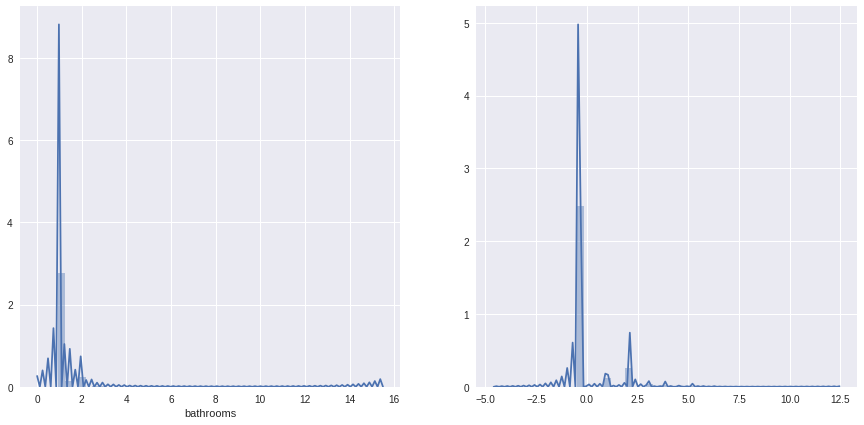

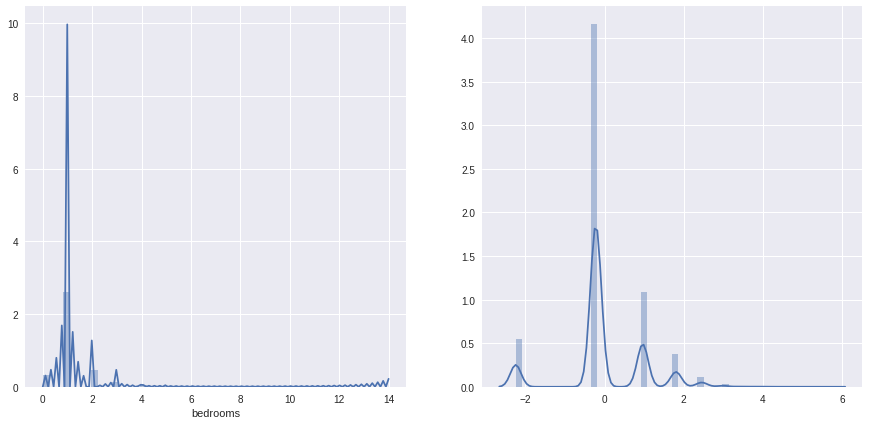

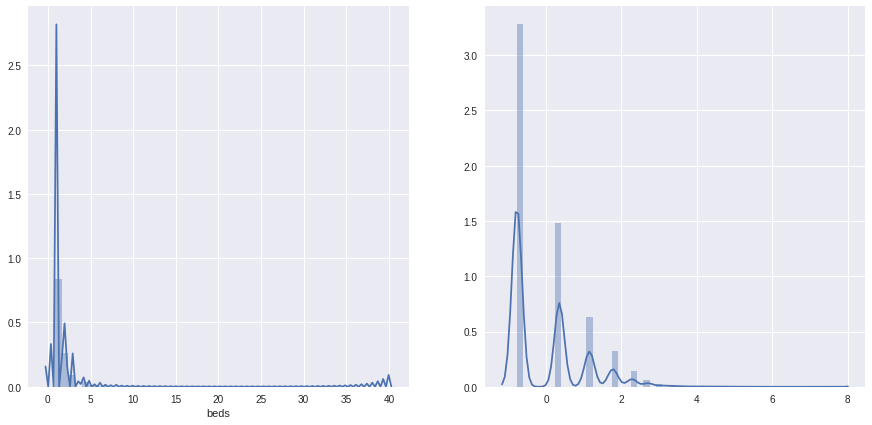

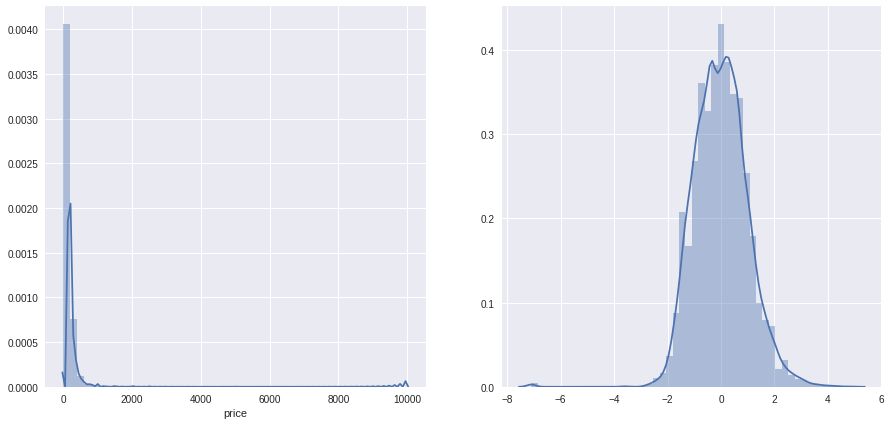

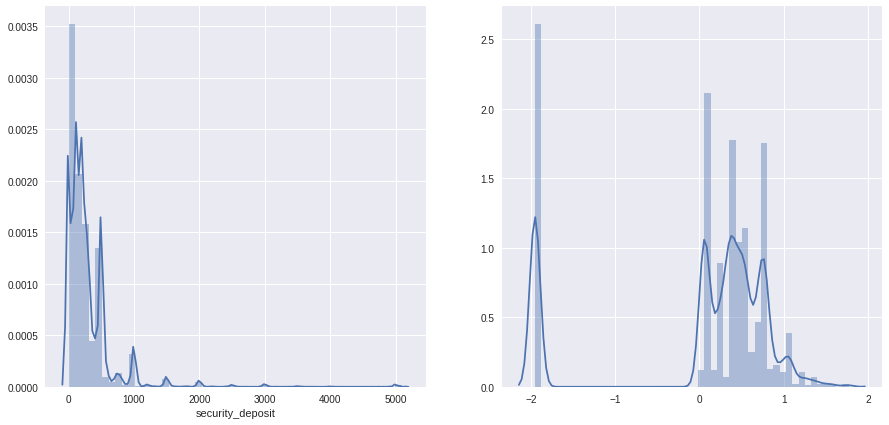

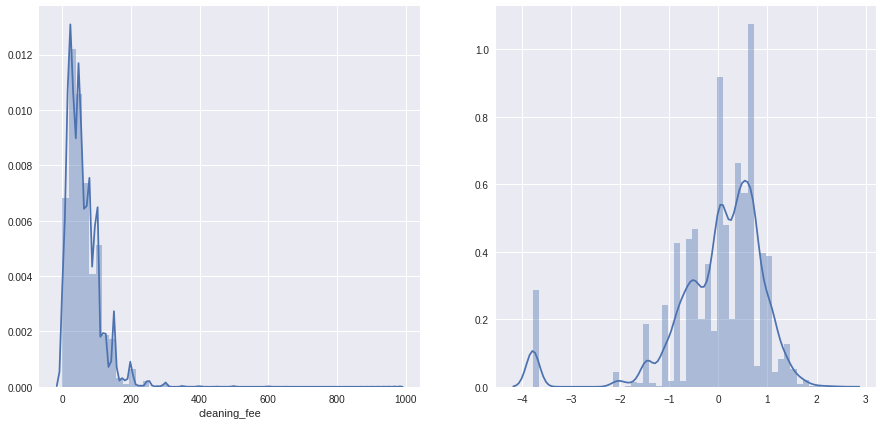

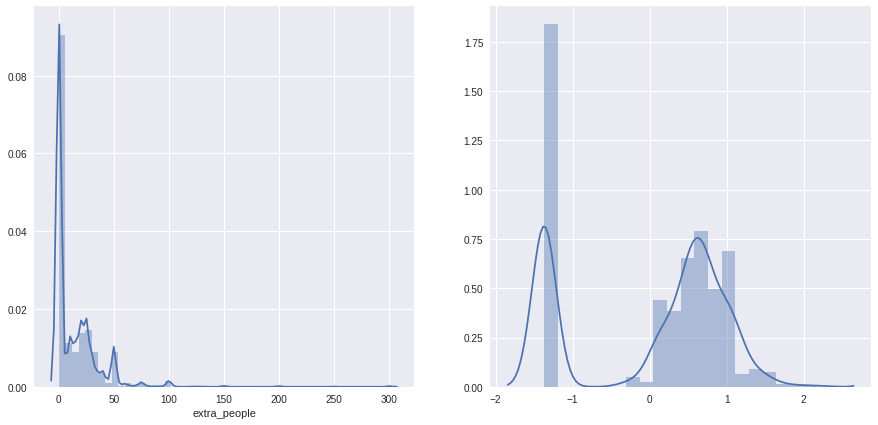

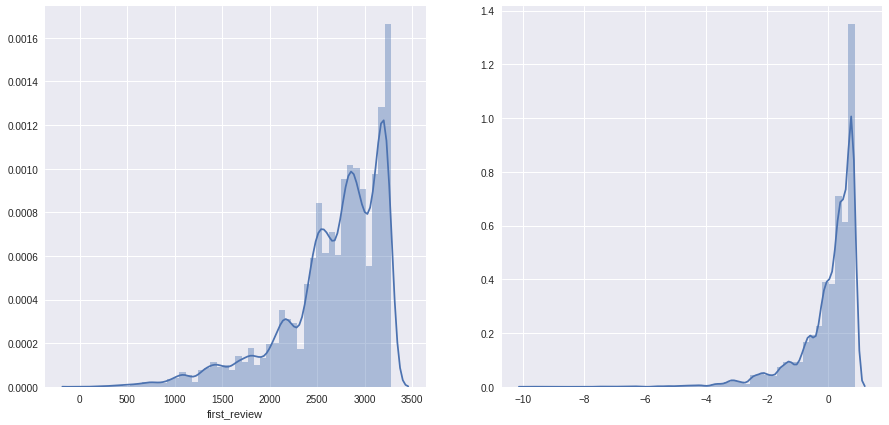

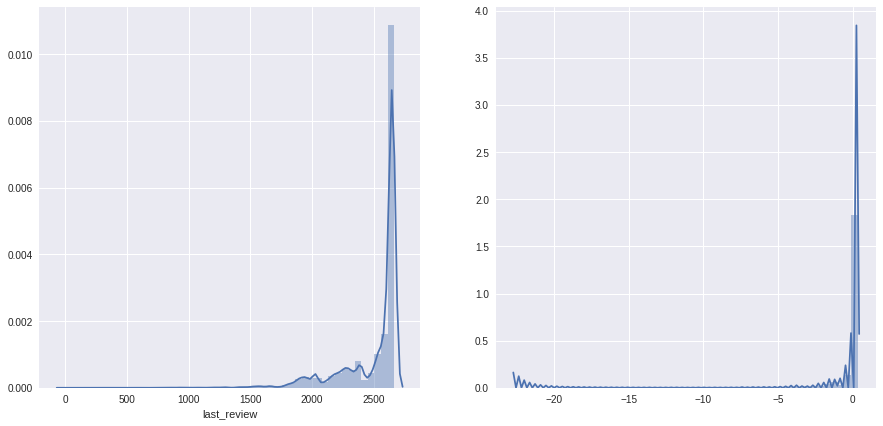

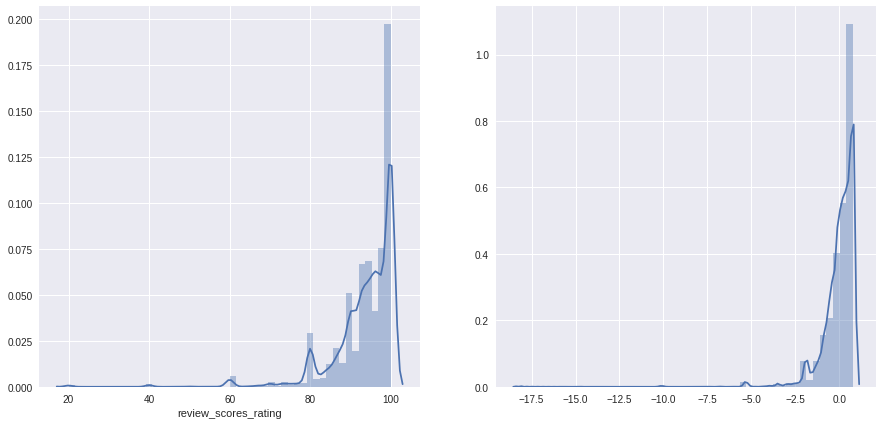

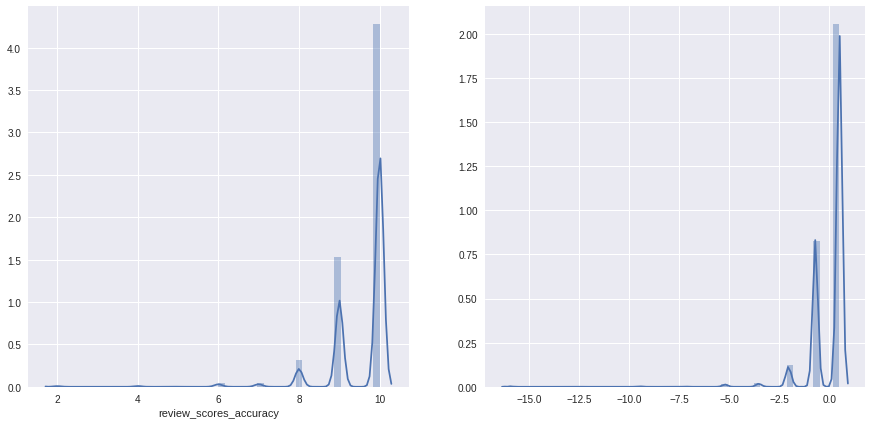

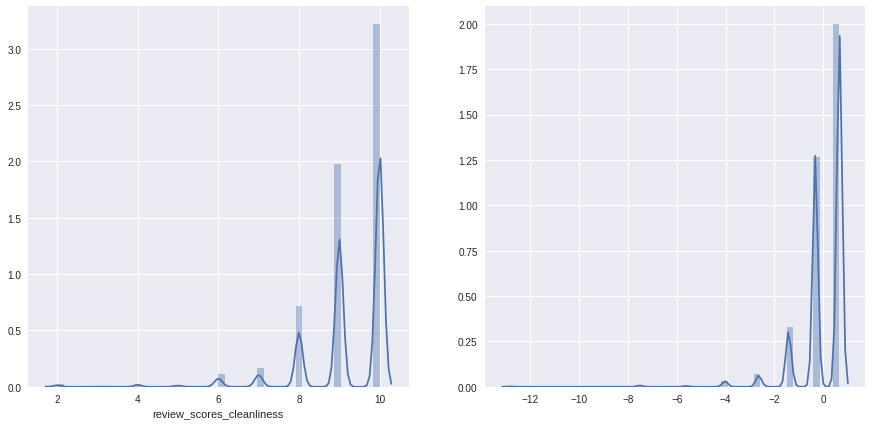

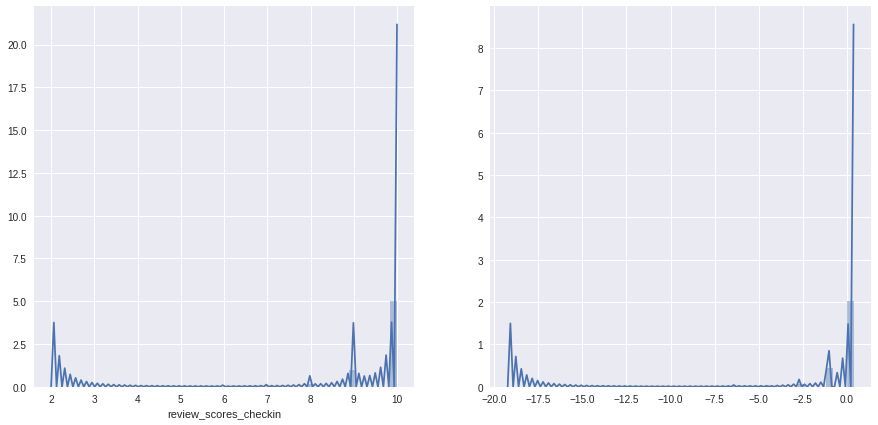

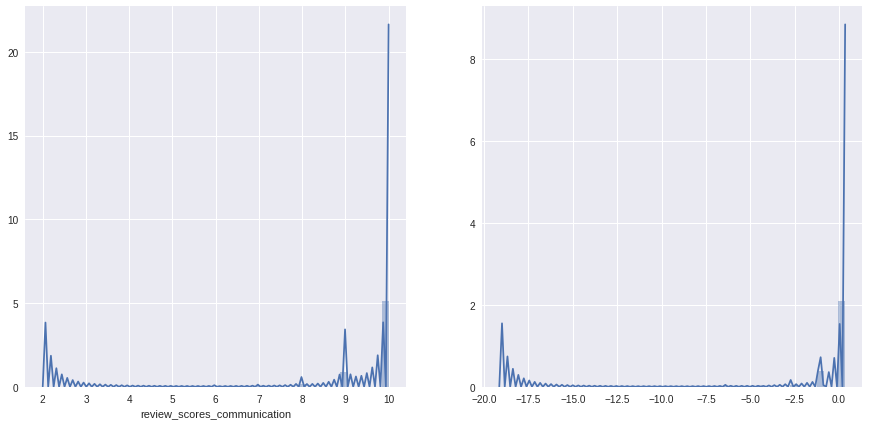

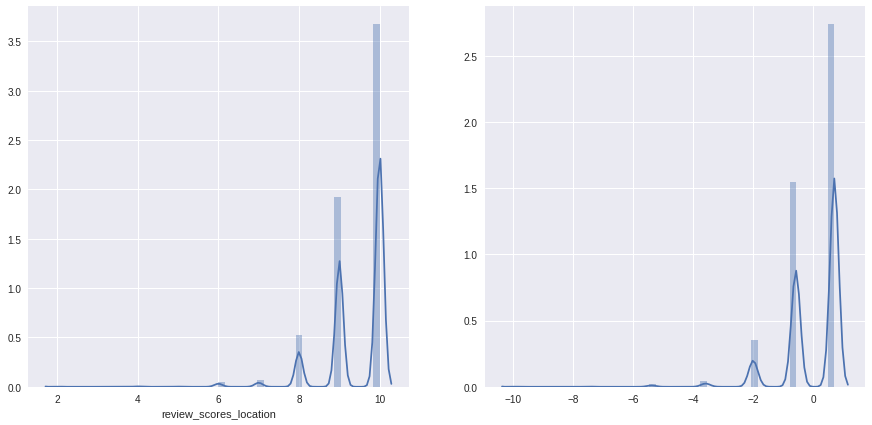

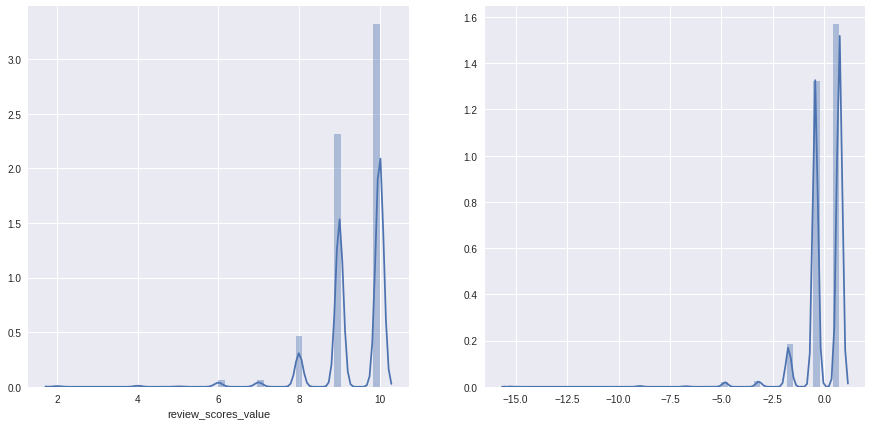

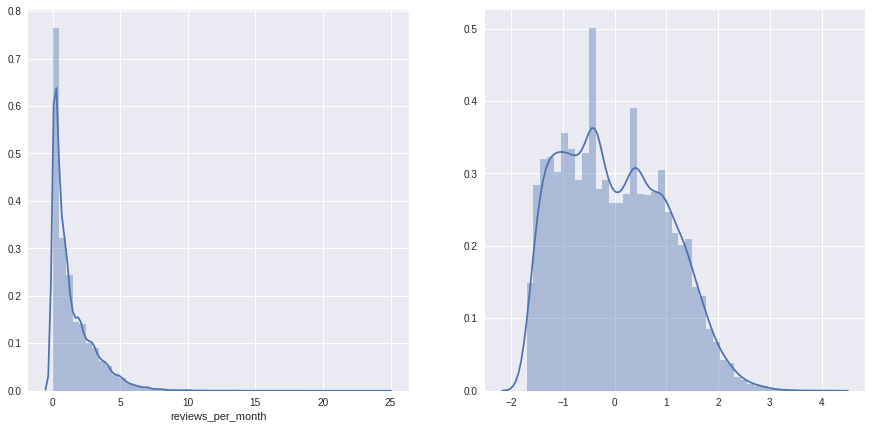

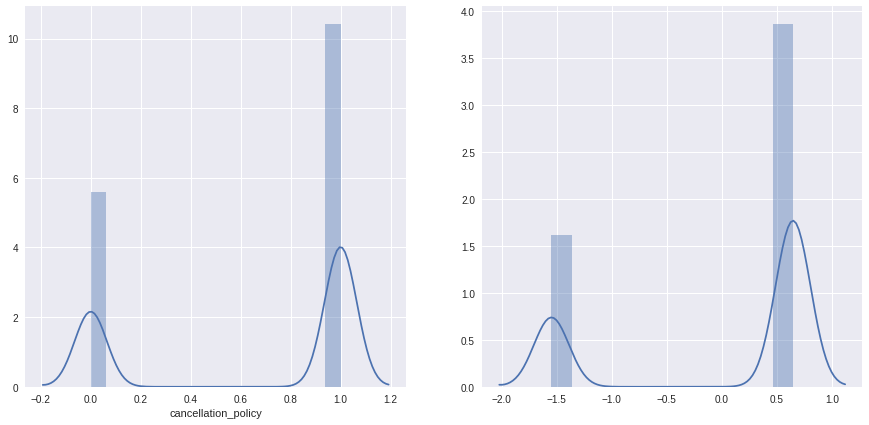

In [24]:
# code from https://www.kaggle.com/joshwilkins2013/churn-baby-churn-user-logs
# left: distribution of unscaled data
# right: distribution of scaled data
from sklearn.preprocessing import StandardScaler
import seaborn as sbn

visData = visData.select_dtypes(include=['float64'])
cols = visData.columns[1:]
log_user_data = visData.copy()
log_user_data[cols] = np.log1p(visData[cols].dropna())
ss = StandardScaler()
#log_user_data[cols] = ss.fit_transform(log_user_data[cols].dropna())

for col in cols:
  try:
    a = ss.fit_transform(log_user_data[col].dropna())
  except:
    pass
  else:
    plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    sbn.distplot(visData[col].dropna())
    plt.subplot(1,2,2)
    sbn.distplot(a)
    plt.figure()

In [0]:
# searate into train and test
rand_num = np.random.rand(mydata.shape[0])
idx_train = (rand_num < 0.8)
train_df = mydata[idx_train]
test_df = mydata[~idx_train]

# fit decision tree for feature selection
import sklearn.tree

mod = sklearn.tree.DecisionTreeRegressor(criterion="mae")
mod.fit(train_df.drop('price',axis=1),train_df['price'])
features = list(train_df.drop('price',axis=1).columns.values)


In [38]:
dict(zip(features, mod.feature_importances_))

{'accommodates': 0.026236106660746741,
 'accommodatesmv': 0.0,
 'availability_365': 0.0061478702636158008,
 'availability_365mv': 0.0,
 'availability_90': 0.064972637169418437,
 'availability_90mv': 0.0,
 'bathrooms': 0.11928821440408105,
 'bathroomsmv': 0.00056386021328270965,
 'bed_type': 0.00055286787861673771,
 'bedrooms': 0.030588158112505318,
 'bedroomsmv': 6.5107224958762437e-07,
 'beds': 0.0077644247852094589,
 'bedsmv': 2.5107826023420382e-06,
 'calculated_host_listings_count': 0.00083907851907515194,
 'calculated_host_listings_countmv': 0.0,
 'cancellation_policy': 0.001830275059087487,
 'cancellation_policymv': 0.0038247365016741701,
 'cleaning_fee': 0.0887392553577772,
 'cleaning_feemv': 0.0026477450353162594,
 'extra_people': 0.0066591966913260216,
 'extra_peoplemv': 0.0,
 'first_review': 0.003555727967109137,
 'first_reviewmv': 0.00026875374463445966,
 'guests_included': 0.0038145887406846385,
 'guests_includedmv': 0.0,
 'host_identity_verified': 0.0039234847590241201,
 '

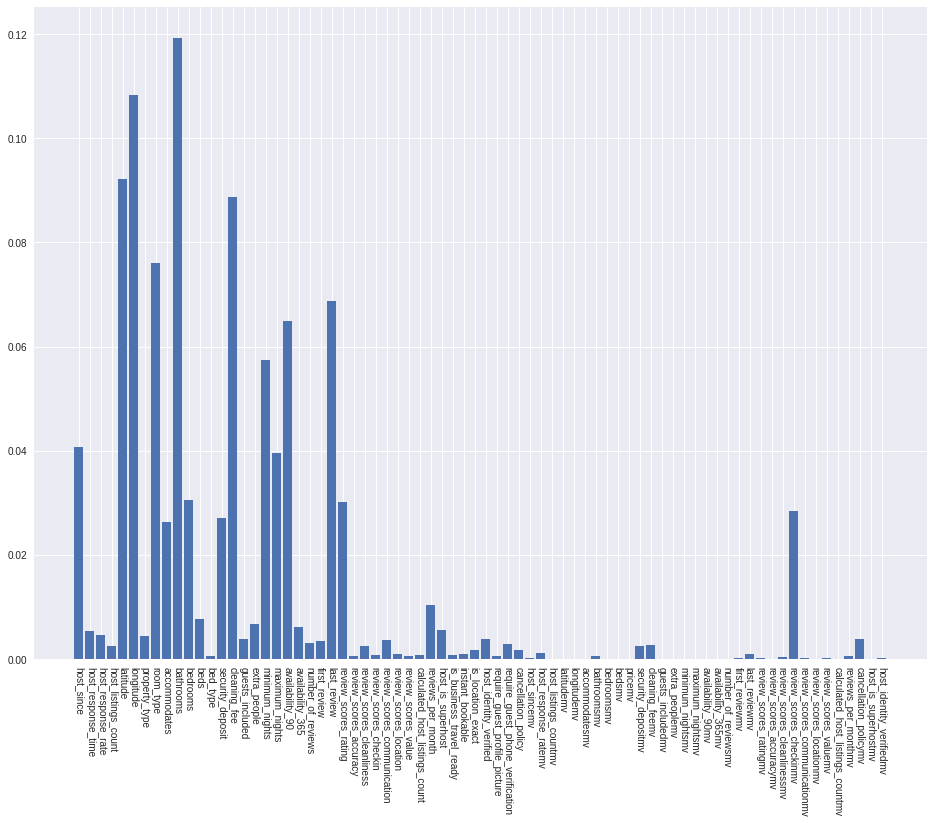

In [39]:

plt.figure(figsize=(16,12))
pos = np.arange(len(features))
plt.bar(pos, mod.feature_importances_)
plt.xticks(pos, features, rotation=-90)
plt.show()



In [6]:
rand_num = np.random.rand(mydata.shape[0])
idx_train = (rand_num < 0.8)
train_df = mydata[idx_train]
test_df = mydata[~idx_train]

# fit decision tree for feature selection
mod = sklearn.tree.DecisionTreeRegressor(criterion="mae")
mod.fit(train_df[["host_since","latitude","longitude","room_type","accommodates",
                  "bathrooms","bedrooms","security_deposit","cleaning_fee","minimum_nights","maximum_nights",
                 "availability_90","last_review","review_scores_rating","review_scores_checkinmv"]],train_df['price'])
modPredict = mod.predict(test_df[["host_since","latitude","longitude","room_type","accommodates",
                  "bathrooms","bedrooms","security_deposit","cleaning_fee","minimum_nights","maximum_nights",
                 "availability_90","last_review","review_scores_rating","review_scores_checkinmv"]])

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

print("Root mean squared error: %.2f"
      % np.sqrt(mean_squared_error(test_df["price"], modPredict)))
print('Variance score: %.2f' % r2_score(test_df["price"], modPredict))
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: %.2f"
      % mean_absolute_error(test_df["price"], modPredict))

Root mean squared error: 226.95
Variance score: -0.40
Mean absolute error: 63.36


In [3]:
import numpy as np
from sklearn import svm
import pandas as pd

In [4]:
df = pd.read_pickle("df4")
df = df.drop(['amenities'], axis = 1)
for var in df.columns:
    df[var] = df[var].astype('float')
df = scaleAirbnbData(df)

In [5]:
rand_num = np.random.rand(df.shape[0])
idx_train = (rand_num < 0.8)
train = df[idx_train]
test = df[~idx_train]

In [6]:
x_train = train.drop(["price"], axis=1)
y_train = train["price"]
x_test = test.drop(["price"] ,axis=1)
y_test = test["price"]


In [7]:
sv = svm.SVR()
sv.fit(x_train , y_train)
modPredict = sv.predict(x_test)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

print("Root mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, modPredict)))
print('Variance score: %.2f' % r2_score(y_test, modPredict))
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, modPredict))

Root mean squared error: 45.11
Variance score: 0.55
Mean absolute error: 31.20


In [44]:
df.columns

Index(['host_response_time', 'host_response_rate', 'host_listings_count',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_90', 'availability_365', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month', 'crimeRate',
       'nearest_subway_distance', 'host_is_superhost',
       'is_business_travel_ready', 'instant_bookable', 'is_location_exact',
       'host_identity_verified', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'host_response_ratemv',
       'host_listings_countmv', 'bathroomsmv', 'bedroomsmv', '

In [45]:
df1 = pd.read_pickle("df1")
df1.shape

(44317, 71)

In [46]:
df.columns

Index(['host_response_time', 'host_response_rate', 'host_listings_count',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_90', 'availability_365', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month', 'crimeRate',
       'nearest_subway_distance', 'host_is_superhost',
       'is_business_travel_ready', 'instant_bookable', 'is_location_exact',
       'host_identity_verified', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'host_response_ratemv',
       'host_listings_countmv', 'bathroomsmv', 'bedroomsmv', '

In [47]:
df2 = pd.read_csv(filename, compression="gzip", index_col=0)
df2.shape

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(44317, 95)

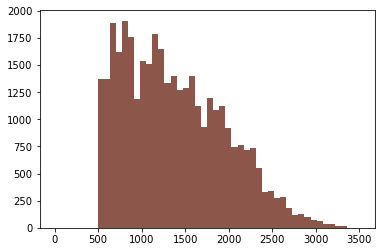

In [63]:
import matplotlib.pyplot as plt
a =(pd.to_datetime("2017-10-03")- pd.to_datetime(df2['host_since'])).dt.days
df1['host_days'] = a
df1 = df1.dropna()
df1.shape
plt.hist(df1['host_days'], 50, range=[a.min(), a.max()])
plt.show()


In [64]:
df1 = df1.drop(df1[df1.host_days > 3500].index)
df1 = df1.drop(df1[df1.host_days < 700].index)
df1 = df1.drop('host_days', 1)
df1.shape

(31595, 71)

In [65]:
df2 = df1.copy()
Q1 = np.percentile(np.array(df2.price),25)
Q2 = np.percentile(np.array(df2.price),50)
Q3 = np.percentile(np.array(df2.price),75)
IQR=Q3 - Q1
infbdd=np.percentile(np.array(df2.price),1)
supbdd=Q3 + 1.5 * IQR 
df2=df2.drop(df2[df2.price > supbdd].index)
df2=df2.drop(df2[df2.price < infbdd].index)

In [66]:
df3 = df2.copy()
keep_index = df3['property_type'].value_counts().index[df3['property_type'].value_counts().values>10]
df3 = df3[df3['property_type'].isin(keep_index)]
df3['property_type'].value_counts().index
nrows = df3.shape[0]
df4 = df3.copy()
valued_lst = df4['property_type'].value_counts().index
for item in valued_lst:
    df4[item] = df4['property_type'] == item
    df4[item] = df4[item].astype(float)
df4 = df4.drop(['property_type'], axis = 1)
valued_lst = df4['bed_type'].value_counts().index
for item in valued_lst:
    df4[item] = df4['bed_type'] == item
    df4[item] = df4[item].astype(float)
df4 = df4.drop(['bed_type'], axis = 1)
valued_lst = df4['cancellation_policy'].value_counts().index
for item in valued_lst:
    df4[item] = df4['cancellation_policy'] == item
    df4[item] = df4[item].astype(float)
df4 = df4.drop(['cancellation_policy'], axis = 1)
df4 = df4.drop(['amenities'], axis = 1)
for var in df4.columns:
    df4[var] = df4[var].astype('float')
df4 = scaleAirbnbData(df4)


In [67]:
rand_num = np.random.rand(df4.shape[0])
idx_train = (rand_num < 0.8)
train = df4[idx_train]
test = df4[~idx_train]

In [70]:
import xgboost as xgb

x_train = train.drop(["price"], axis=1)
y_train = train["price"]
x_test = test.drop(["price"] ,axis=1)
y_test = test["price"]

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,verbose_eval=20, show_stdv=False)
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()



[0]	train-rmse:132.722	test-rmse:132.734
[20]	train-rmse:61.2751	test-rmse:61.7885
[40]	train-rmse:41.6173	test-rmse:42.803
[60]	train-rmse:36.9644	test-rmse:38.7353
[80]	train-rmse:35.3748	test-rmse:37.6037
[100]	train-rmse:34.4902	test-rmse:37.1025
[120]	train-rmse:33.8479	test-rmse:36.7984
[140]	train-rmse:33.337	test-rmse:36.6218
[160]	train-rmse:32.8898	test-rmse:36.4792
[180]	train-rmse:32.4742	test-rmse:36.3719
[200]	train-rmse:32.0972	test-rmse:36.2886
[220]	train-rmse:31.7567	test-rmse:36.2094
[240]	train-rmse:31.4398	test-rmse:36.1599
[260]	train-rmse:31.1133	test-rmse:36.1
[280]	train-rmse:30.8093	test-rmse:36.0608
[300]	train-rmse:30.5388	test-rmse:36.0343
[320]	train-rmse:30.2661	test-rmse:35.9993
[340]	train-rmse:29.977	test-rmse:35.9707
[360]	train-rmse:29.7169	test-rmse:35.9621
[380]	train-rmse:29.4577	test-rmse:35.9515
[400]	train-rmse:29.2121	test-rmse:35.9305
[420]	train-rmse:28.96	test-rmse:35.9129
[440]	train-rmse:28.7164	test-rmse:35.8939
[460]	train-rmse:28.4828	

In [68]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 0
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)


num_boost_rounds = 1000
model = xgb.train(xgb_params, dtrain, num_boost_round=num_boost_rounds)


y_predict = model.predict(dtest)
raw_output = pd.DataFrame({ 'price': y_predict,'true_price':y_test})

In [69]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print('mean_absolute_error',mean_absolute_error(y_test,y_predict))
rmae = np.sum(np.abs((y_test-y_predict)/y_test))/y_predict.shape[0]
print('relative_mean_absolute_error',rmae)

mean_absolute_error 25.1918277204
relative_mean_absolute_error 0.22900058309280263
